In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split#2차원 배열로 변환

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input =train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
#최근접 이웃개수를 3으로 하는 모델을 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print(knr.predict([[50]]))#실제로는 훨씬 더 많이 나감

[1033.33333333]


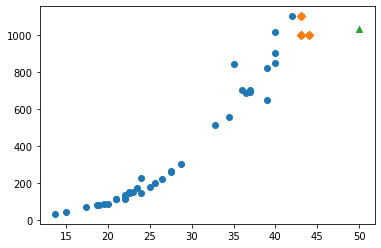

In [10]:
#이 농어의 최근접 이웃을 산점도에 표시

import matplotlib.pyplot as plt

#50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50,1033,marker='^')
plt.show()

In [11]:
#이웃 샘플들의 평균
print(np.mean(train_target[indexes]))#예측 값과 같음

1033.3333333333333


In [12]:
print(knr.predict([[100]]))#100이라도 같음

[1033.33333333]


In [13]:
print(knr.predict([[300]]))#300이라도 같음

[1033.33333333]


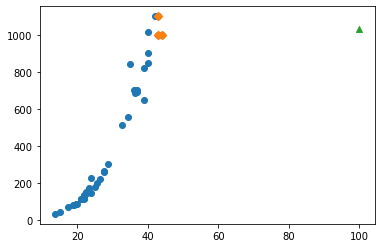

In [14]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')

plt.scatter(100,1033,marker='^')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [16]:
#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [17]:
#50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [19]:
print(lr.coef_, lr.intercept_)#기울기와 y절편

[39.01714496] -709.0186449535477


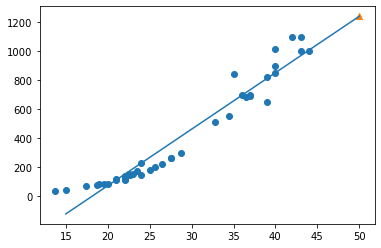

In [22]:
#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#15에서 60까지 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8,marker='^')
plt.show()

In [23]:
#R^2 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [26]:
#2차 방정식을 만들기 위해서
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [27]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [28]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [30]:
print(lr.coef_, lr.intercept_)#x^2의 계수, x의 계수, y절편
#무게 = 1.01 x 길이^2 + -21.6 x 길이 + 116.05

[  1.01433211 -21.55792498] 116.05021078278259


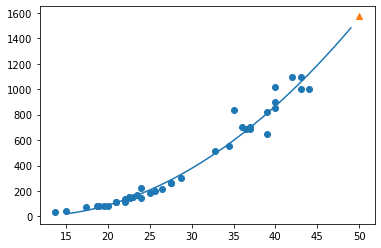

In [33]:
#구간별 직선을 그리기 위해 15에서 49까지 정수배열을 만듭니다
point = np.arange(15,50)

#훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2-21.6*point+116.05)

#50cm 농어데이터
plt.scatter([50],[1574],marker='^')
plt.show()

In [34]:
#2차방정식 R^2 점수 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325121
